___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [131]:
df0 = pd.read_csv("Mall_Customers.csv")
df_customer = df0.copy()
df_customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Explore Data

You can rename columns to more usable, if you need.

In [132]:
df_customer.rename(columns = {"CustomerID":"customer_id", "Gender":"gender", "Age":"age", "Annual Income (k$)": "income",
                       "Spending Score (1-100)":"score"}, inplace = True)

In [133]:
df_customer

,customer_id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [134]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  200 non-null    int64 
 1   gender       200 non-null    object
 2   age          200 non-null    int64 
 3   income       200 non-null    int64 
 4   score        200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [135]:
df_customer.describe()

,customer_id,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [136]:
import plotly.express as px
fig = px.imshow(df_customer.corr(),
                height=1000,
                width=1000,
                range_color=[-1,1])
fig.show()

In [137]:
from ipywidgets import interact
import plotly.graph_objects as go
def column_histogram(col, show_kde=False):
    plt.figure(figsize=(10, 5))
    
    sns.histplot(df_customer[col], kde=show_kde, bins=80)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    plt.show()
cols = df_customer.columns
interact(column_histogram, col=cols, show_kde=True)

interactive(children=(Dropdown(description='col', options=('customer_id', 'gender', 'age', 'income', 'score'),…

<function __main__.column_histogram(col, show_kde=False)>

In [138]:
def column_boxer(col):
    fig = px.box(df_customer, y=col)
    fig.show()
cols = df_customer.columns
interact(column_boxer, col=cols)

interactive(children=(Dropdown(description='col', options=('customer_id', 'gender', 'age', 'income', 'score'),…

<function __main__.column_boxer(col)>

In [139]:
# income in grafiginde 137 gelirli olan outlier olma ihtimali var.
df_customer[df_customer["income"] == 137]

,customer_id,gender,age,income,score
198,199,Male,32,137,18
199,200,Male,30,137,83


In [266]:
df_customer.mean()

customer_id    100.50
age             38.85
income          60.56
score           50.20
dtype: float64

In [271]:
df_customer[df_customer["gender"] == "Male"].median()

customer_id    106.5
age             37.0
income          62.5
score           50.0
dtype: float64

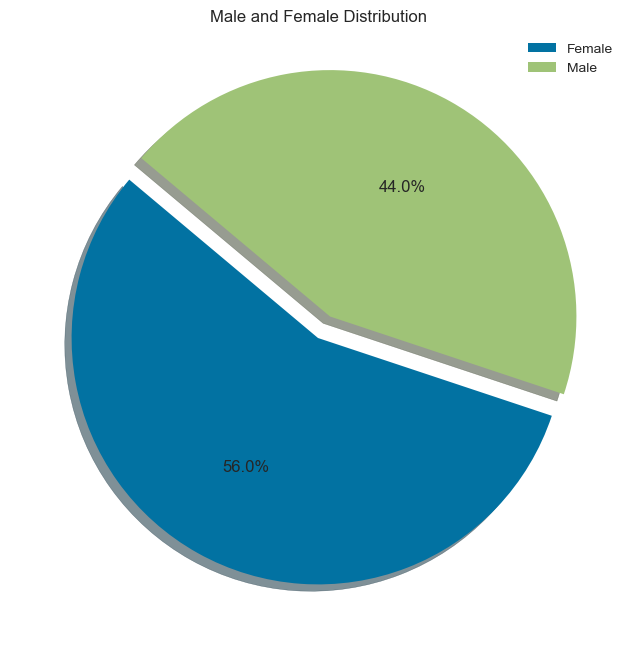

In [272]:
plt.figure(figsize=(8, 8))

explode = [0, 0.1]
plt.pie(df_customer['gender'].value_counts(),
        explode=explode,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140)
plt.legend(labels=['Female', 'Male'])
plt.title('Male and Female Distribution')
plt.axis('off')
plt.show()
# We compare gender ratios, which is one of the important issues in customer segmentation.

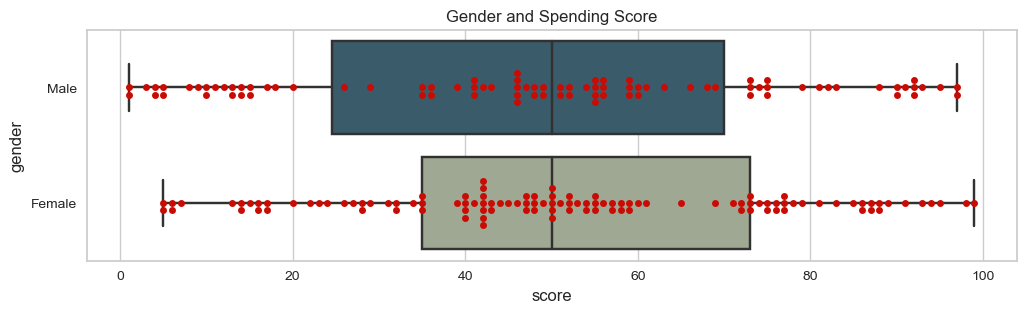

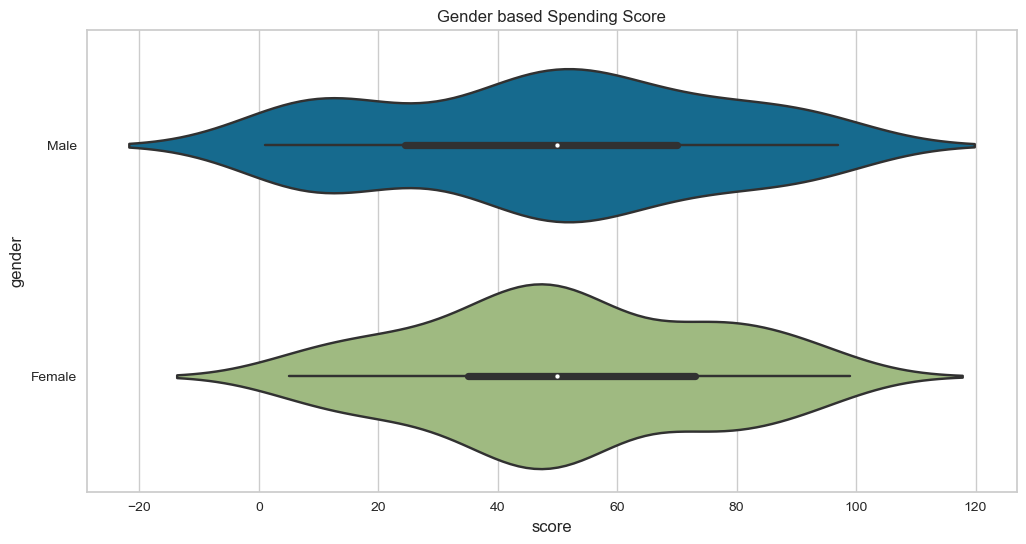

In [273]:
plt.figure(figsize=(12, 3))
sns.swarmplot(x='score', y='gender', data=df_customer, color="r")
sns.boxplot(x='score', y='gender', data=df_customer, saturation=.3)
plt.title('Gender and Spending Score')
plt.show()

# stripplot : used to look at the density of categorical data.

plt.figure(figsize=(12, 6))
sns.violinplot(x='score', y='gender', data=df_customer)
plt.title('Gender based Spending Score')
plt.show()

# With violinplot, we can see the density situation that we can't see in boxplot.

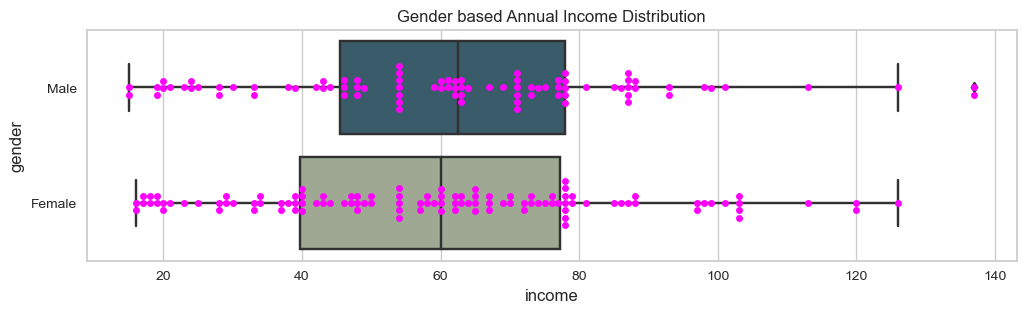

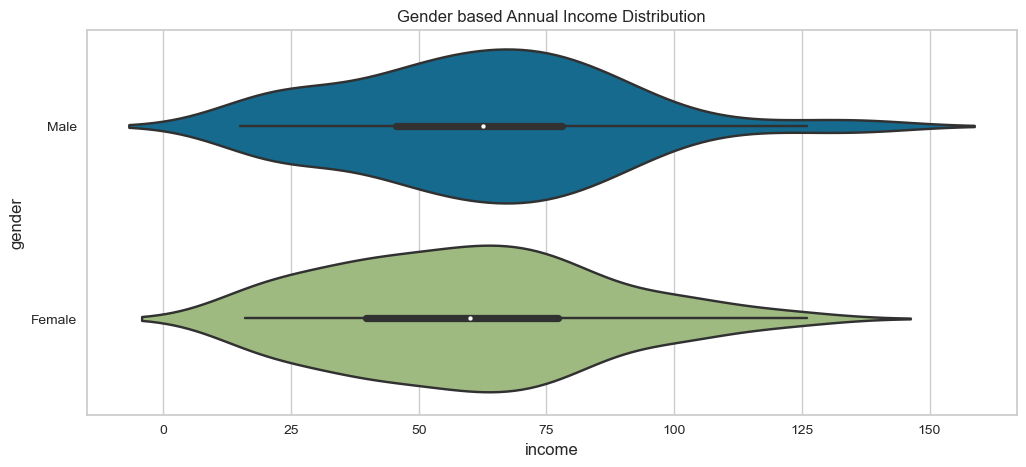

In [274]:
plt.figure(figsize=(12, 3))
sns.swarmplot(x='income', y='gender', data=df_customer, color="magenta")
sns.boxplot(x='income', y='gender', data=df_customer, saturation=0.3)
plt.title('Gender based Annual Income Distribution')
plt.show()

plt.figure(figsize=(12, 5))
sns.violinplot(x='income', y='gender', data=df_customer, orient="h")
plt.title('Gender based Annual Income Distribution')
plt.show()

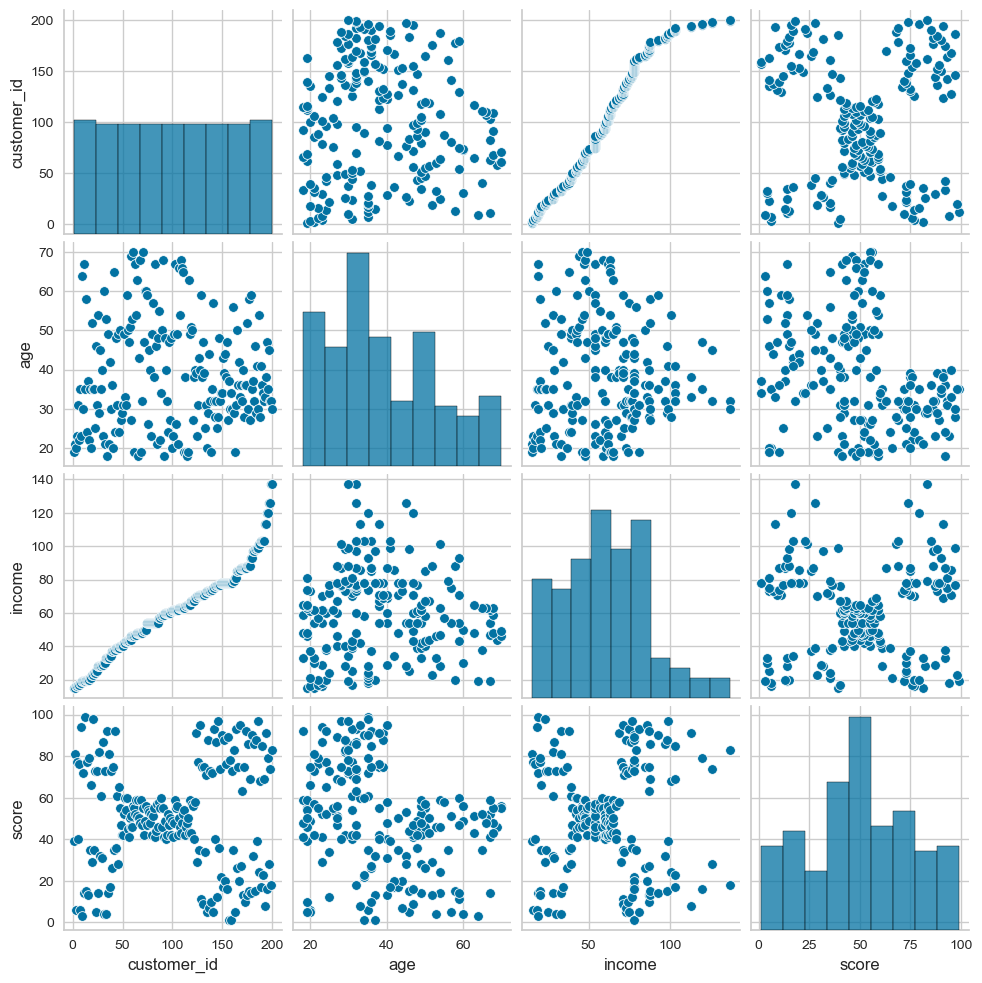

In [140]:
sns.pairplot(df_customer, )
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

# Data Preprocessing

#### *i. Create a new dataset with two variables of your choice*

In [141]:
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

# Modelling

## Hopkins Test
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [142]:
from typing import Union
from sklearn.neighbors import BallTree


def hopkins(data_frame: Union[np.ndarray, pd.DataFrame], sampling_size: int) -> float:
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """

    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)

    data_frame_sample = sample_observation_from_dataset(data_frame, sampling_size)

    sample_distances_to_nearest_neighbours = get_distance_sample_to_nearest_neighbours(
        data_frame, data_frame_sample
    )

    uniformly_selected_observations_df = simulate_df_with_same_variation(
        data_frame, sampling_size
    )

    df_distances_to_nearest_neighbours = get_nearest_sample(
        data_frame, uniformly_selected_observations_df
    )

    x = sum(sample_distances_to_nearest_neighbours)
    y = sum(df_distances_to_nearest_neighbours)

    if x + y == 0:
        raise Exception("The denominator of the hopkins statistics is null")

    return x / (x + y)[0]


def get_nearest_sample(df: pd.DataFrame, uniformly_selected_observations: pd.DataFrame):
    tree = BallTree(df, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    return uniformly_df_distances_to_nearest_neighbours


def simulate_df_with_same_variation(
    df: pd.DataFrame, sampling_size: int
) -> pd.DataFrame:
    max_data_frame = df.max()
    min_data_frame = df.min()
    uniformly_selected_values_0 = np.random.uniform(
        min_data_frame[0], max_data_frame[0], sampling_size
    )
    uniformly_selected_values_1 = np.random.uniform(
        min_data_frame[1], max_data_frame[1], sampling_size
    )
    uniformly_selected_observations = np.column_stack(
        (uniformly_selected_values_0, uniformly_selected_values_1)
    )
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(
                min_data_frame[i], max_data_frame[i], sampling_size
            )
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    return uniformly_selected_observations_df


def get_distance_sample_to_nearest_neighbours(df: pd.DataFrame, data_frame_sample):
    tree = BallTree(df, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    return data_frame_sample_distances_to_nearest_neighbours


def sample_observation_from_dataset(df, sampling_size: int):
    if sampling_size > df.shape[0]:
        raise Exception("The number of sample of sample is bigger than the shape of D")
    data_frame_sample = df.sample(n=sampling_size)
    return data_frame_sample

In [143]:
df1=df_customer[["age", "score"]].copy()
df2=df_customer[["age", "score"]].copy()

In [144]:
result = []
for _ in range(10):
    result.append(hopkins(MinMaxScaler().fit_transform(df1), 1))
np.mean(result)

0.3654844749780289

In [145]:
result = []
for _ in range(10):
    result.append(hopkins(StandardScaler().fit_transform(df2), 1))
np.mean(result)

0.28221145742648507

In [146]:
X = df_customer[["age", "score"]]

In [147]:
X

,age,score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [148]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [149]:
hopkins(X, 1)

0.5555971332322469

In [150]:
X

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992],
       [-1.20926872,  1.00159627],
       [-0.27630176, -1.71591298],
       [-1.13750203,  1.70038436],
       [ 1.80493225, -1.83237767],
       [-0.6351352 ,  0.84631002],
       [ 2.02023231, -1.4053405 ],
       [-0.27630176,  1.89449216],
       [ 1.37433211, -1.36651894],
       [-1.06573534,  1.04041783],
       [-0.13276838, -1.44416206],
       [-1.20926872,  1.11806095],
       [-0.27630176, -0.59008772],
       [-1.3528021 ,  0.61338066],
       [ 0.94373197, -0.82301709],
       [-0.27630176,  1.8556706 ],
       [-0.27630176, -0.59008772],
       [-0.99396865,  0.88513158],
       [ 0.51313183, -1.75473454],
       [-0.56336851,  0.88513158],
       [ 1.08726535, -1.4053405 ],
       [-0.70690189,  1.23452563],
       [ 0.44136514, -0.7065524 ],
       [-0.27630176,  0.41927286],
       [ 0.08253169,

#### *ii. Determine optimal number of clusters*

# Choosing The Optimal Number of Clusters

## Elbow metod

In [151]:
ssd = []

K = range(2,10) # 1 den baslanmaz. 1 butun veri setinin 1 kume olmasi demek.
# genelde 2 ile 10 arasi icin yapilir.
for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X)
    ssd.append(model.inertia_) # her bir k icin bir hata degeri elde edecek.
    # bir yerden sonra hata degerleri azalacak.

Text(0.5, 1.0, 'elbow method')

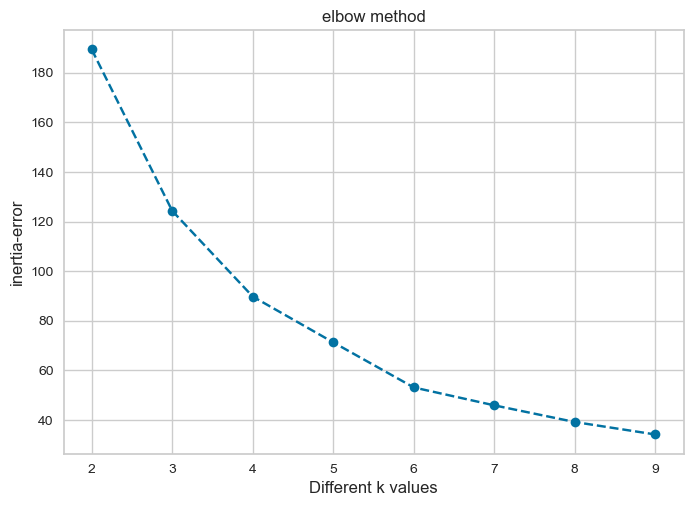

In [152]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [153]:
ssd # sum of squared distance
# 3 te dirsek yaptigi goruluyor.

[189.38749033992428,
 124.32628617921526,
 89.76521676586152,
 71.29556592219438,
 53.128438356294005,
 45.90710456567847,
 39.1851961213981,
 34.168841096196275]

In [154]:
-pd.Series(ssd).diff()
# her satirin bir onceki satirla farkini donduruyor.

0          NaN
1    65.061204
2    34.561069
3    18.469651
4    18.167128
5     7.221334
6     6.721908
7     5.016355
dtype: float64

In [155]:
K = range(2, 10)
distortion = [] # bos bir liste atiyorum. 
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X)
    distances = kmeanModel.transform(X) # distances from each observation to each cluster centroid. her bir gozlewmin kendi cluster centroid i arasindaki farki aldik.
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

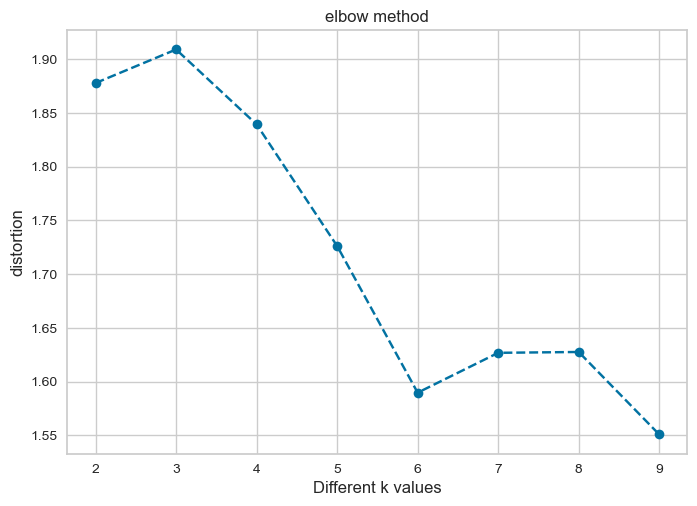

In [156]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

## Silhouette analysis

### Why silhouette_score is negative?

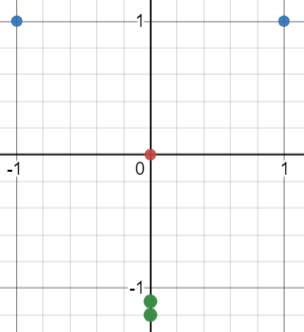

In [157]:
# cluster sayisi 3 secildiginde negaitf sihoutte score donduruyor.

In [158]:
from sklearn.metrics import silhouette_score
# silhouette_score ; It is a metric that measures the quality of our clustering.
# When calculating, both inter cluster distance and intra cluster distance are taken into account.
# ranges -1 to 1, bad to good respectively.

In [159]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.44754858878462783
For n_clusters=6, the silhouette score is 0.4566283030197353
For n_clusters=7, the silhouette score is 0.4114882432090666
For n_clusters=8, the silhouette score is 0.4048295376259236


#### *iii. Apply K Means*

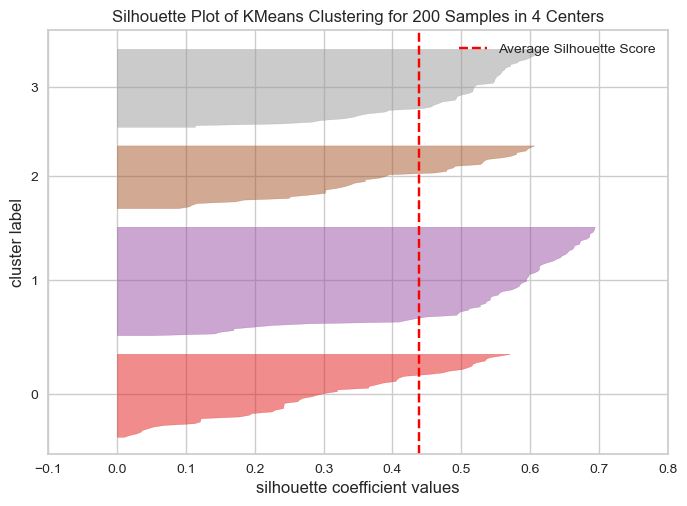

Indices with negative Silhouette scores: []


In [160]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4,
                random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

silhouette_scores = visualizer.silhouette_samples_

negative_silhouette_indices = np.where(silhouette_scores < 0)[0]

print("Indices with negative Silhouette scores:", negative_silhouette_indices)

In [161]:
visualizer.silhouette_samples_

array([0.50844679, 0.52676091, 0.24208287, 0.53580882, 0.53527818,
       0.49495581, 0.30197983, 0.58714298, 0.30189232, 0.57274153,
       0.10872012, 0.61729918, 0.35985368, 0.55910745, 0.33842387,
       0.53451211, 0.3194381 , 0.16903248, 0.1043463 , 0.62409449,
       0.3194381 , 0.51181434, 0.59971423, 0.59736572, 0.47801684,
       0.68160775, 0.17173763, 0.19770124, 0.11594401, 0.5975746 ,
       0.39468422, 0.40876393, 0.5322204 , 0.49227514, 0.57270522,
       0.52676091, 0.52716702, 0.59396305, 0.01065889, 0.42059604,
       0.35131848, 0.61045793, 0.11328764, 0.16936751, 0.24905105,
       0.22484339, 0.57079771, 0.47215211, 0.53370821, 0.51478535,
       0.54513375, 0.1417157 , 0.19116525, 0.60811708, 0.49276696,
       0.29514186, 0.57103209, 0.4902316 , 0.37610563, 0.55125025,
       0.51804138, 0.2620476 , 0.55730268, 0.60396265, 0.59384969,
       0.12162515, 0.23771338, 0.52241854, 0.12072956, 0.40922323,
       0.51734998, 0.328427  , 0.59900235, 0.61686629, 0.58329

In [162]:
visualizer.silhouette_samples_[visualizer.silhouette_samples_ <0]

array([], dtype=float64)

In [163]:
clusters = model.fit_predict(X)
clusters

array([0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 3, 1, 3, 1,
       2, 1, 3, 0, 0, 0, 3, 1, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       1, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1])

In [164]:
df_kmeans_age_score = df_customer.copy()
df_kmeans_age_score["clusters"] = clusters

In [165]:
df_kmeans_age_score.loc[[18, 28, 44, 100]]

,customer_id,gender,age,income,score,clusters
18,19,Male,52,23,29,2
28,29,Female,40,29,31,2
44,45,Female,49,39,28,2
100,101,Female,23,62,41,0


In [166]:
df_kmeans_age_score

,customer_id,gender,age,income,score,clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [167]:
df_kmeans_age_score.clusters.value_counts()

1    65
0    50
3    47
2    38
Name: clusters, dtype: int64

In [168]:
fig = px.scatter_3d(x=df_kmeans_age_score["score"],
                   y=df_kmeans_age_score["income"],
                   z=df_kmeans_age_score["age"],
                   color= df_kmeans_age_score.clusters,
                   labels = {"x": "Spending Score (1-100)",
                             "y": "Annual Income (k$)",
                             "z": "Age"},
                   hover_name= df_kmeans_age_score["income"])

fig.show()

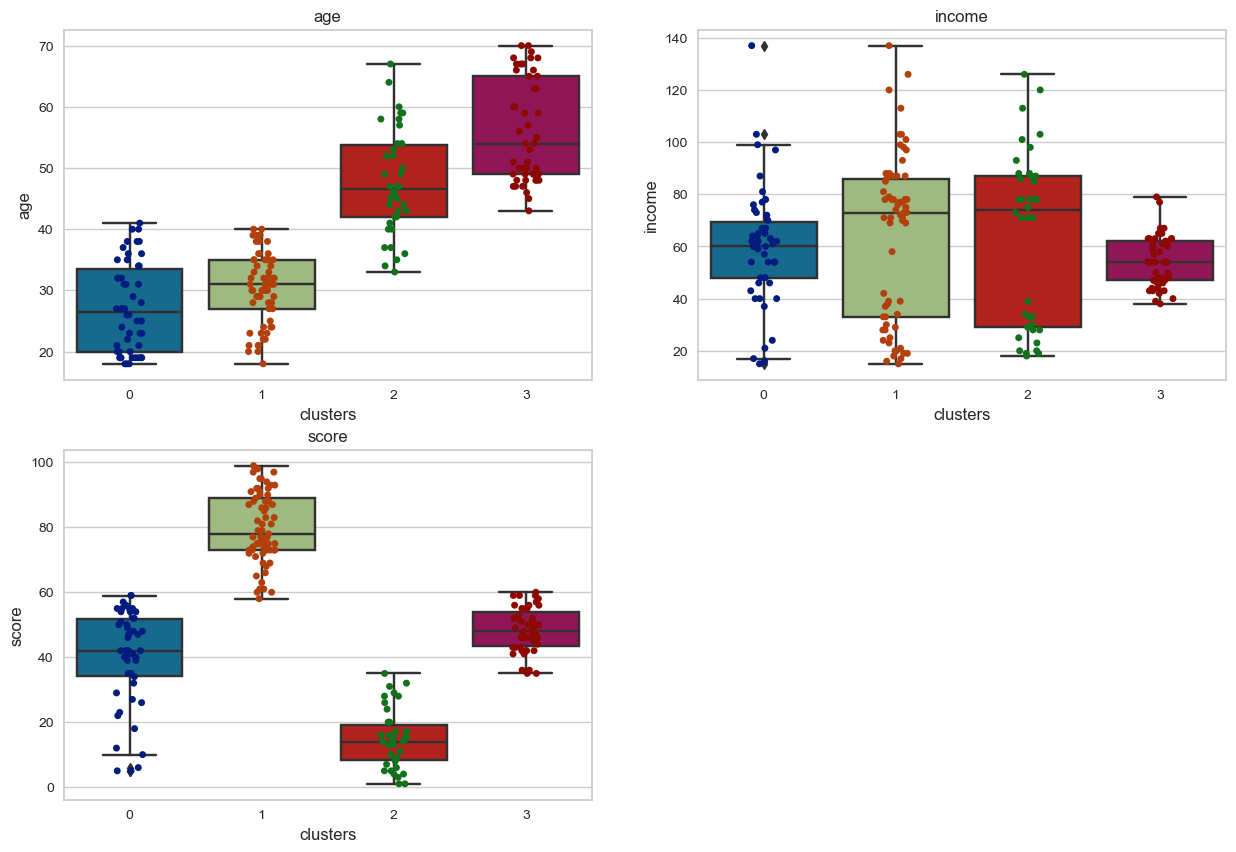

In [169]:
numeric_columns = df_kmeans_age_score.drop(['clusters', 'customer_id'], axis=1).select_dtypes(include='number').columns

num_plots = len(numeric_columns)
num_cols = 2

num_rows = (num_plots + num_cols - 1) // num_cols
plt.figure(figsize=(15, num_rows * 5))

for i, feature in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=feature, x="clusters", data=df_kmeans_age_score)
    sns.stripplot(y=feature, x="clusters", data=df_kmeans_age_score, palette="dark", size=5)
    plt.title(feature)

<Figure size 2000x1000 with 0 Axes>

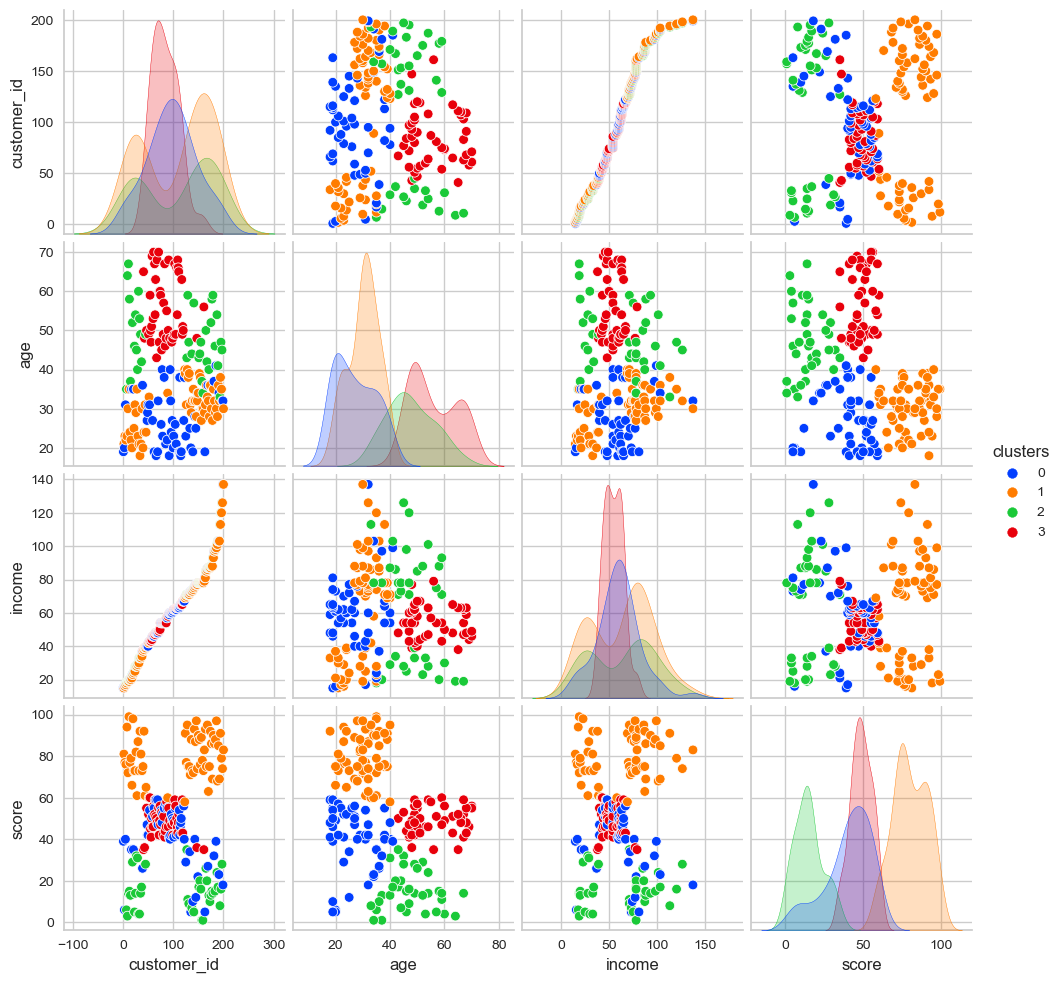

In [170]:
plt.figure(figsize=(20,10))
sns.pairplot(data=df_kmeans_age_score, hue="clusters", palette="bright");

#### *iv. Visualizing and Labeling All the Clusters*

**Evaluation**
- 3 : Elderly-Aged Mid Spenders
- 2 : Youth Low Spenders : Customers with middle-aged age and slightly higher spending compared to Class 0 but less than Class 1
- 0 : Middle-Aged Low Spenders: This class represents customers who are young in age but have moderate spending scores.
- 1 : Youth-High Spenders: buraya aciklama girilecek.

In [171]:
df_kmeans_age_score

,customer_id,gender,age,income,score,clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [172]:
df_kmeans_age_score.clusters.value_counts()

1    65
0    50
3    47
2    38
Name: clusters, dtype: int64

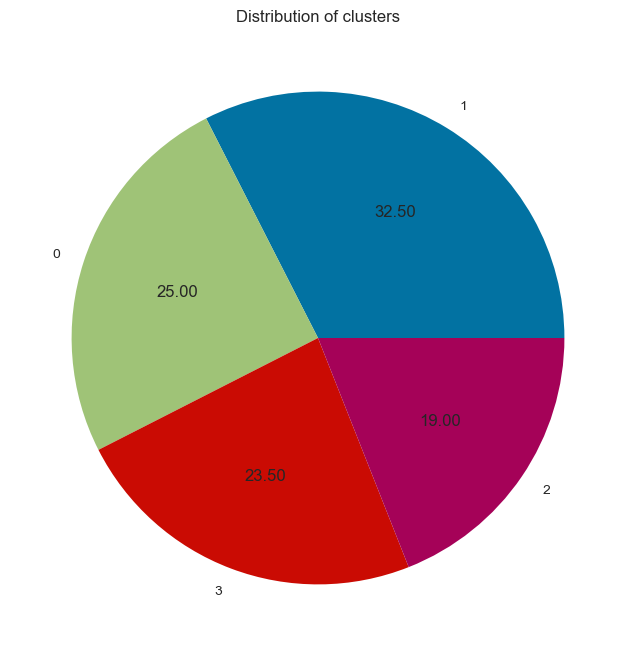

In [173]:
df_kmeans_age_score["clusters"].value_counts().plot(kind="pie", autopct='%.2f', figsize=[8,8], label="")
plt.title('Distribution of clusters');

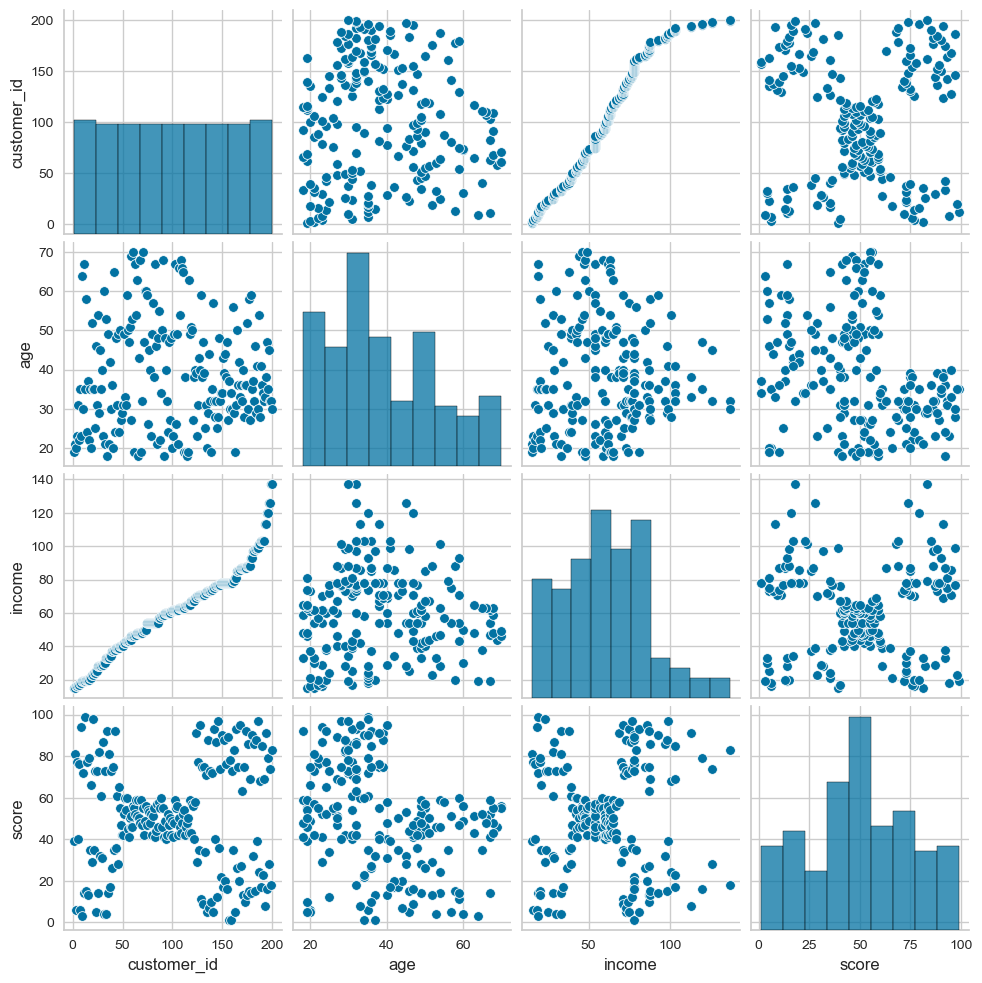

In [174]:
sns.pairplot(df_customer)
plt.show()

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [175]:
df1=df_customer[["income", "score"]].copy()
df2=df_customer[["income", "score"]].copy()

In [176]:
result = []
for _ in range(10):
    result.append(hopkins(MinMaxScaler().fit_transform(df1), 1))
np.mean(result)

0.4554102690597805

In [177]:
result = []
for _ in range(10):
    result.append(hopkins(StandardScaler().fit_transform(df2), 1))
np.mean(result)

0.42721048167702697

In [178]:
X = df_customer[["income", "score"]]

In [179]:
X

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [180]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [181]:
hopkins(X, 1)

0.18507821535023292

In [182]:
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

#### *ii. Determine optimal number of clusters*

# Choosing The Optimal Number of Clusters

## Elbow metod

In [183]:
ssd = []

K = range(2,10) # 1 den baslanmaz. 1 butun veri setinin 1 kume olmasi demek.
# genelde 2 ile 10 arasi icin yapilir.
for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X)
    ssd.append(model.inertia_) # her bir k icin bir hata degeri elde edecek.
    # bir yerden sonra hata degerleri azalacak.

Text(0.5, 1.0, 'elbow method')

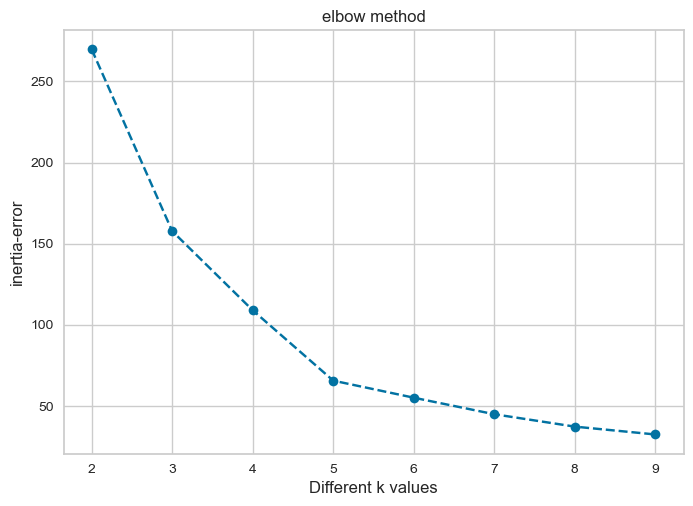

In [184]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [185]:
ssd # sum of squared distance
# 3 te dirsek yaptigi goruluyor.

[269.69101219276394,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270386,
 44.86475569922557,
 37.228187677585886,
 32.392267630331176]

In [186]:
-pd.Series(ssd).diff()
# her satirin bir onceki satirla farkini donduruyor.

0           NaN
1    111.987004
2     48.782692
3     43.352908
4     10.511060
5     10.192593
6      7.636568
7      4.835920
dtype: float64

In [187]:
K = range(2, 10)
distortion = [] # bos bir liste atiyorum. 
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X)
    distances = kmeanModel.transform(X) # distances from each observation to each cluster centroid. her bir gozlewmin kendi cluster centroid i arasindaki farki aldik.
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

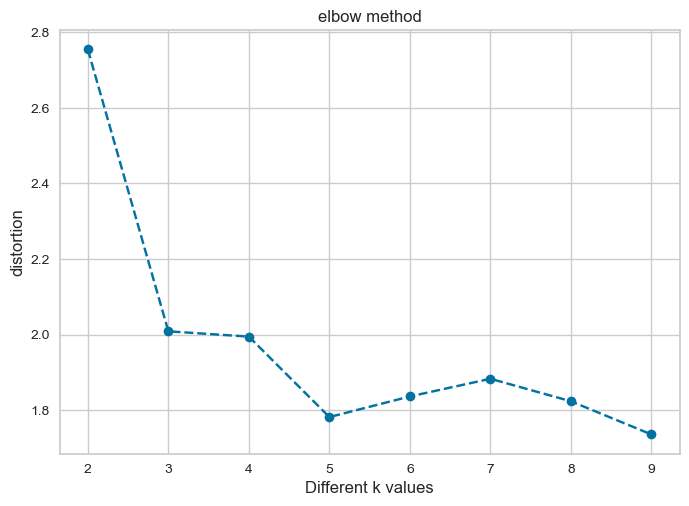

In [188]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

## Silhouette analysis

### Why silhouette_score is negative?

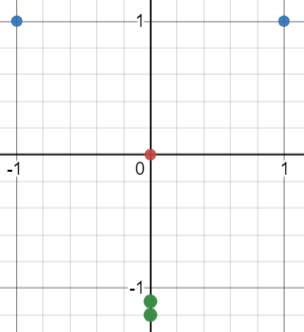

In [189]:
from sklearn.metrics import silhouette_score
# silhouette_score ; It is a metric that measures the quality of our clustering.
# When calculating, both inter cluster distance and intra cluster distance are taken into account.
# ranges -1 to 1, bad to good respectively.

In [190]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3212707813918878
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5281492781108291
For n_clusters=8, the silhouette score is 0.4552147906587443


#### *iii. Apply K Means*

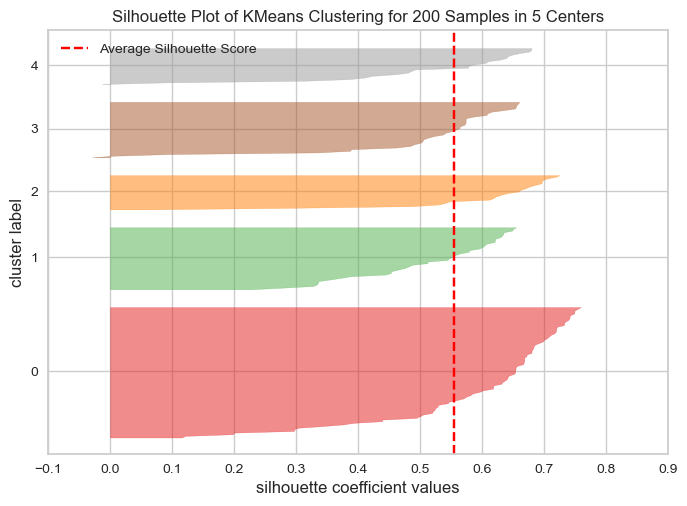

Indices with negative Silhouette scores: [ 42 146]


In [191]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)  # Verileri modele uyarlayın
visualizer.poof()

silhouette_scores = visualizer.silhouette_samples_

negative_silhouette_indices = np.where(silhouette_scores < 0)[0]

print("Indices with negative Silhouette scores:", negative_silhouette_indices)


In [192]:
visualizer.silhouette_samples_

array([ 0.41124046,  0.69620683,  0.63934069,  0.69604195,  0.38563359,
        0.69748215,  0.64833998,  0.65893138,  0.62927054,  0.66184814,
        0.67709497,  0.62250892,  0.67914947,  0.7183836 ,  0.67989007,
        0.72517377,  0.480728  ,  0.54086604,  0.57771355,  0.63069704,
        0.46089203,  0.67601561,  0.64089467,  0.67033897,  0.66074953,
        0.70471845,  0.48567333,  0.29331369,  0.4925691 ,  0.6846275 ,
        0.60601978,  0.61174317,  0.57727428,  0.61836077,  0.6096252 ,
        0.64028425,  0.58637068,  0.52937454,  0.42191998,  0.48596674,
        0.09076309,  0.54813337, -0.01212476,  0.12114123,  0.3126116 ,
        0.04964594,  0.39355123,  0.43860327,  0.29680812,  0.29680812,
        0.52456542,  0.3036705 ,  0.51899981,  0.34289529,  0.49331338,
        0.37566018,  0.60191899,  0.54434561,  0.64121219,  0.59585853,
        0.55956233,  0.58127935,  0.65113096,  0.50415135,  0.6798204 ,
        0.52847598,  0.6854379 ,  0.66721797,  0.52847598,  0.65

In [193]:
visualizer.silhouette_samples_[model.labels_ == 3]

# 3.clusterdaki negatif silhoutte skorlarina dikkatli bakalim.

array([ 0.00764375,  0.49029886,  0.50127655,  0.537264  ,  0.54029448,
        0.55104299,  0.56412338,  0.58606281, -0.0285739 ,  0.48454354,
        0.56375597,  0.5219891 ,  0.57384919,  0.57352612,  0.57352612,
        0.09680221,  0.61522539,  0.50523555,  0.60844915,  0.50415471,
        0.65818112,  0.65536989,  0.65999533,  0.65450519,  0.65347442,
        0.46172751,  0.63563191,  0.33477575,  0.57159713,  0.6072932 ,
        0.57327602,  0.55770996,  0.51238747,  0.38845537,  0.38766848])

In [194]:
visualizer.silhouette_samples_[model.labels_ == 4]

# 4.clusterdaki negatif silhoutte skorlarina dikkatli bakalim.

array([ 0.41124046,  0.63934069,  0.38563359,  0.64833998,  0.62927054,
        0.67709497,  0.67914947,  0.67989007,  0.480728  ,  0.57771355,
        0.46089203,  0.64089467,  0.66074953,  0.48567333,  0.4925691 ,
        0.60601978,  0.57727428,  0.6096252 ,  0.58637068,  0.42191998,
        0.09076309, -0.01212476,  0.3126116 ])

In [195]:
clusters = model.labels_ #.fit_predict;(X)
clusters

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [196]:
df_kmeans_income_score = df_customer.copy()
df_kmeans_income_score["clusters"] = clusters

In [197]:
df_kmeans_income_score.loc[[42, 146]]

,customer_id,gender,age,income,score,clusters
42,43,Male,48,39,36,4
146,147,Male,48,77,36,3


In [198]:
#

In [199]:
df_kmeans_income_score[df_kmeans_income_score["clusters"] ==0].mean()

customer_id    86.320988
age            42.716049
income         55.296296
score          49.518519
clusters        0.000000
dtype: float64

In [200]:
df_kmeans_income_score[df_kmeans_income_score["clusters"] ==3].mean()

customer_id    164.371429
age             41.114286
income          88.200000
score           17.114286
clusters         3.000000
dtype: float64

In [201]:
df_kmeans_income_score.clusters.value_counts()

0    81
1    39
3    35
4    23
2    22
Name: clusters, dtype: int64

#### *iv. Visualizing and Labeling All the Clusters*

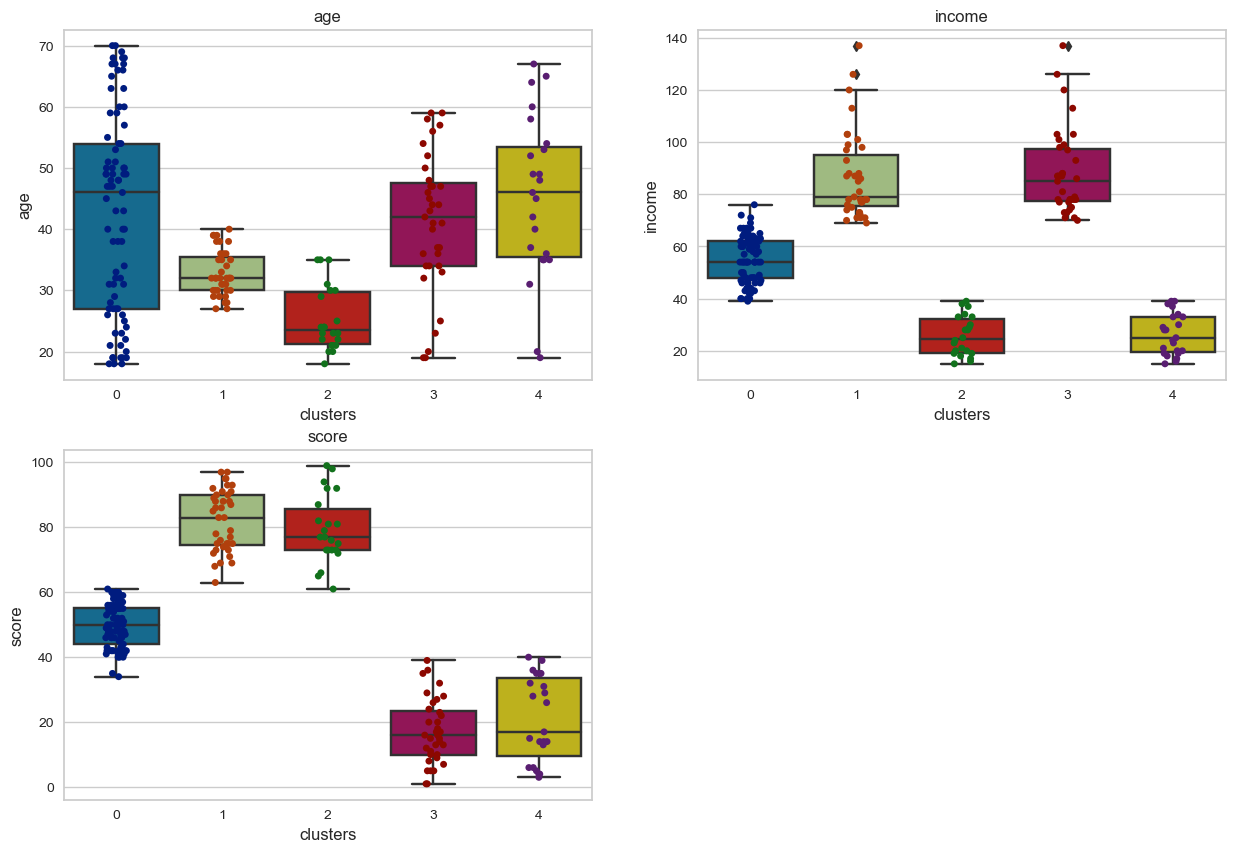

In [202]:
numeric_columns = df_kmeans_income_score.drop(['clusters', 'customer_id'], axis=1).select_dtypes(include='number').columns

num_plots = len(numeric_columns)
num_cols = 2

num_rows = (num_plots + num_cols - 1) // num_cols
plt.figure(figsize=(15, num_rows * 5))

for i, feature in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=feature, x="clusters", data=df_kmeans_income_score)
    sns.stripplot(y=feature, x="clusters", data=df_kmeans_income_score, palette="dark", size=5)
    plt.title(feature)

In [203]:
fig = px.scatter_3d(x=df_kmeans_income_score["score"],
                   y=df_kmeans_income_score["income"],
                   z=df_kmeans_income_score["age"],
                   color= df_kmeans_income_score.clusters,
                   labels = {"x": "Spending Score (1-100)",
                             "y": "Annual Income (k$)",
                             "z": "Age"},
                   hover_name= df_kmeans_income_score["income"])

fig.show()

<Figure size 2000x1000 with 0 Axes>

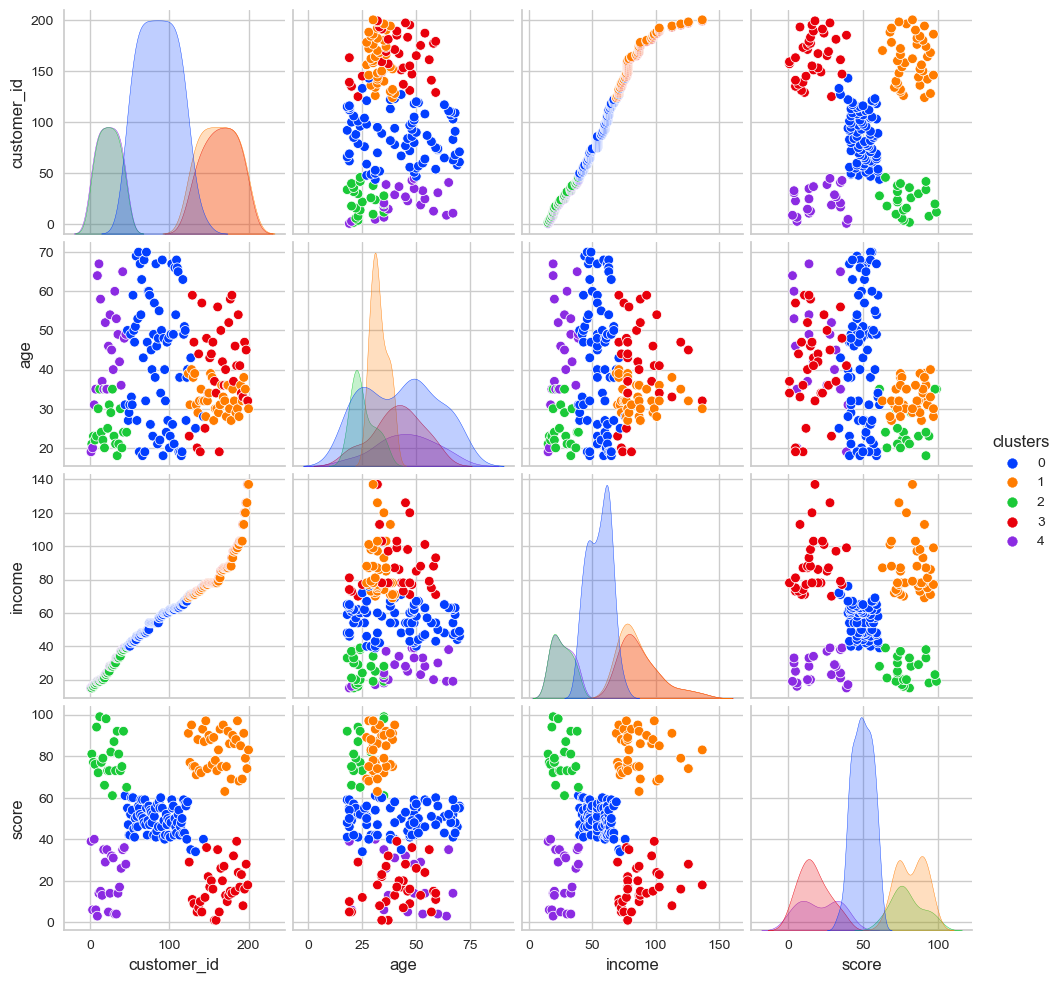

In [204]:
plt.figure(figsize=(20,10))
sns.pairplot(data=df_kmeans_income_score, hue="clusters", palette="bright");

In [205]:
df_kmeans_income_score

,customer_id,gender,age,income,score,clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

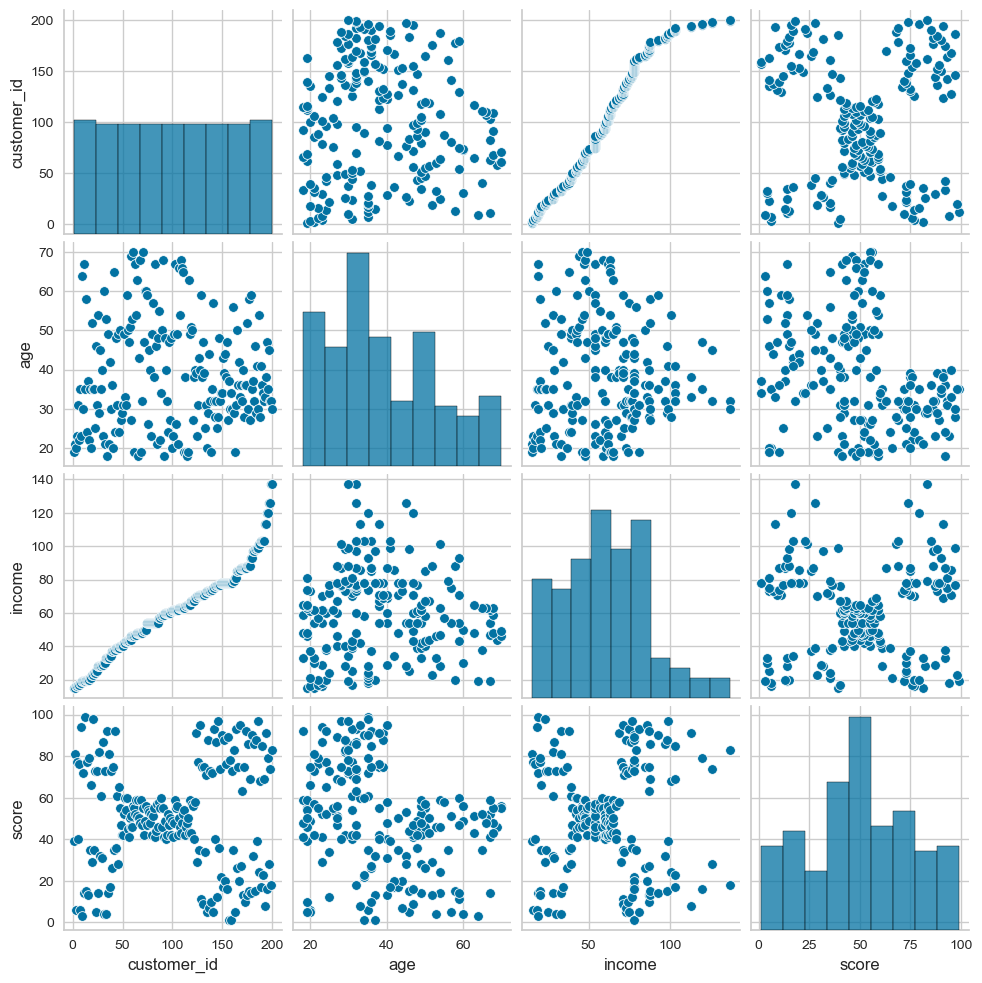

In [206]:
sns.pairplot(df_customer)
plt.show()

### Clustering based on Age and Spending Score- x1

In [207]:
df1=df_customer[["age", "score"]].copy()
df2=df_customer[["age", "score"]].copy()

In [208]:
result = []
for _ in range(10):
    result.append(hopkins(MinMaxScaler().fit_transform(df1), 1))
np.mean(result)

0.35756411462443266

In [209]:
result = []
for _ in range(10):
    result.append(hopkins(StandardScaler().fit_transform(df2), 1))
np.mean(result)

0.4313360894649761

In [210]:
X_age_score = df_customer[["age", "score"]].copy()

In [211]:
X_age_score

,age,score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [212]:
scaler_minmax = MinMaxScaler()
X_age_score = scaler_minmax.fit_transform(X_age_score)

In [213]:
hopkins(X_age_score, 1)

0.6194547430200249

In [214]:
X_age_score

array([[0.01923077, 0.3877551 ],
       [0.05769231, 0.81632653],
       [0.03846154, 0.05102041],
       [0.09615385, 0.7755102 ],
       [0.25      , 0.39795918],
       [0.07692308, 0.76530612],
       [0.32692308, 0.05102041],
       [0.09615385, 0.94897959],
       [0.88461538, 0.02040816],
       [0.23076923, 0.7244898 ],
       [0.94230769, 0.13265306],
       [0.32692308, 1.        ],
       [0.76923077, 0.14285714],
       [0.11538462, 0.7755102 ],
       [0.36538462, 0.12244898],
       [0.07692308, 0.79591837],
       [0.32692308, 0.34693878],
       [0.03846154, 0.66326531],
       [0.65384615, 0.28571429],
       [0.32692308, 0.98979592],
       [0.32692308, 0.34693878],
       [0.13461538, 0.73469388],
       [0.53846154, 0.04081633],
       [0.25      , 0.73469388],
       [0.69230769, 0.13265306],
       [0.21153846, 0.82653061],
       [0.51923077, 0.31632653],
       [0.32692308, 0.6122449 ],
       [0.42307692, 0.30612245],
       [0.09615385, 0.87755102],
       [0.

## Hierarchical Clustering (Agglomerative)

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distance

## Dendrogram

- Tree-like hierarchical representation of clusters is called a dendrogram.   
- It illustrates the arrangement of the clusters produced by the corresponding analyses.

In [215]:
from scipy.cluster.hierarchy import dendrogram, linkage

# The affinity hyperparameter specifies how to measure the distance between observations. The default is euclidean.
# Linkage hyperparameter Specifies how these distances will be measured (ward, compelete, single, average).

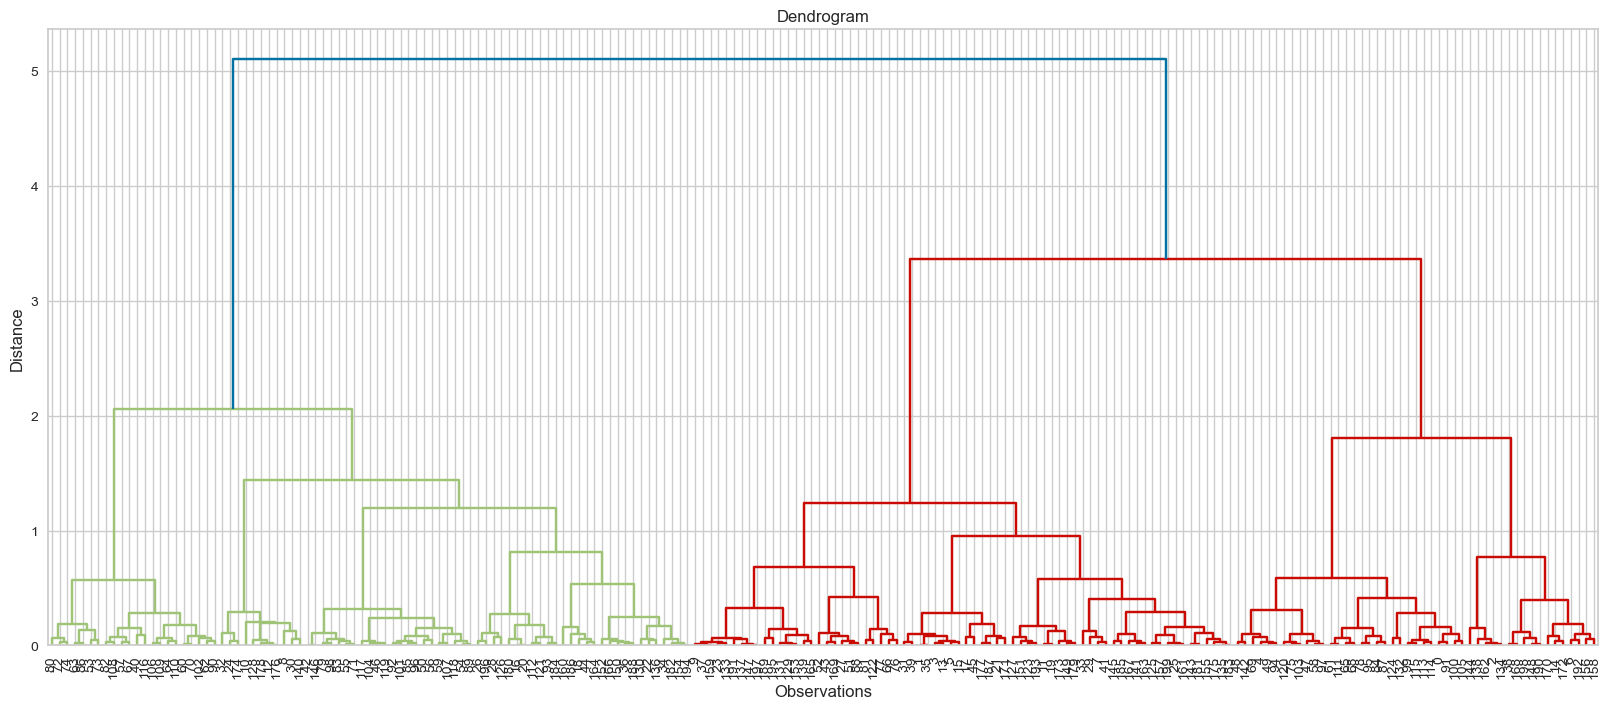

In [216]:
hc_ward_age = linkage(y=X_age_score, method="ward") 
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward_age, leaf_font_size = 10);

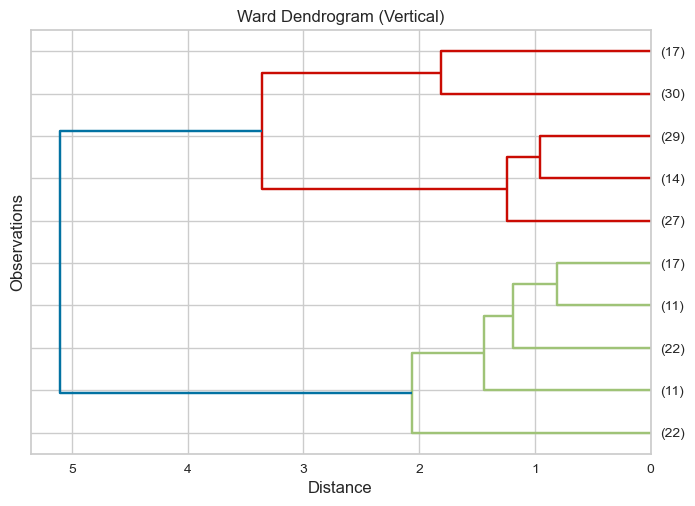

In [217]:
# Dendrogram çizimi (dikey)
plt.title("Ward Dendrogram (Vertical)")
plt.xlabel("Distance")
plt.ylabel("Observations")
dendrogram(hc_ward_age, leaf_font_size=10, truncate_mode='lastp', p=10, orientation='left')

plt.show();

## Clustering based on Annual Income and Spending Score- x2

In [218]:
df1=df_customer[["income", "score"]].copy()
df2=df_customer[["income", "score"]].copy()

In [219]:
result = []
for _ in range(10):
    result.append(hopkins(MinMaxScaler().fit_transform(df1), 1))
np.mean(result)

0.32415769871055283

In [220]:
result = []
for _ in range(10):
    result.append(hopkins(StandardScaler().fit_transform(df2), 1))
np.mean(result)

0.41420767785720153

In [221]:
X_income_score = df_customer[["income", "score"]].copy()

In [222]:
X_income_score

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [223]:
scaler_standard = StandardScaler()
X_income_score = scaler_standard.fit_transform(X_income_score)

In [224]:
hopkins(X_income_score, 1)

0.412020579379101

In [225]:
X_income_score

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## Hierarchical Clustering (Agglomerative)

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distance

## Dendrogram

- Tree-like hierarchical representation of clusters is called a dendrogram.   
- It illustrates the arrangement of the clusters produced by the corresponding analyses.

In [226]:
from scipy.cluster.hierarchy import dendrogram, linkage

# The affinity hyperparameter specifies how to measure the distance between observations. The default is euclidean.
# Linkage hyperparameter Specifies how these distances will be measured (ward, compelete, single, average).

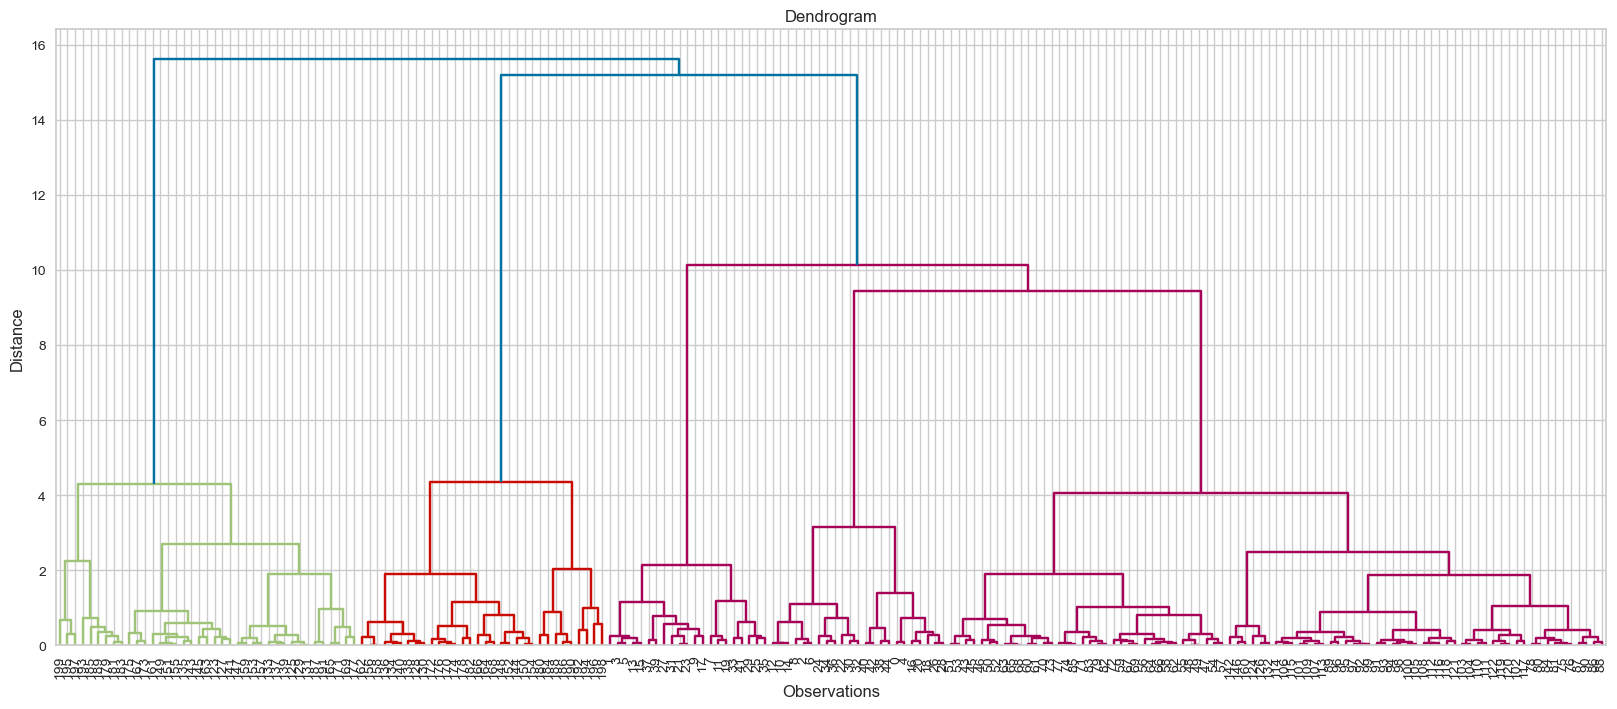

In [227]:
hc_ward_income = linkage(y=X_income_score, method="ward") 
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward_income, leaf_font_size = 10);

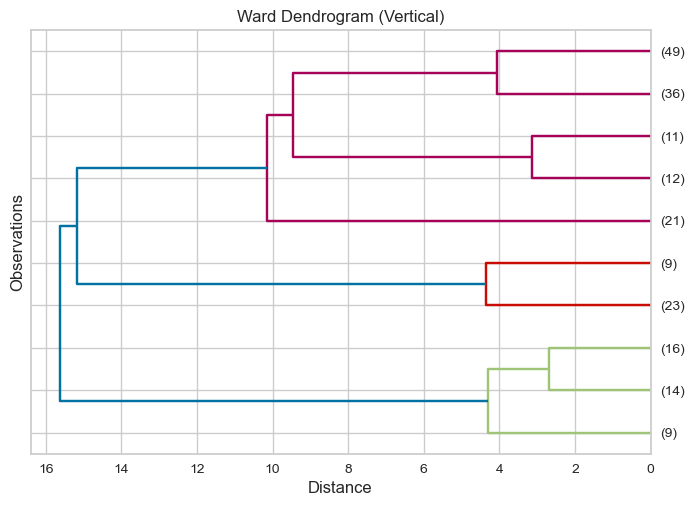

In [228]:
# Dendrogram çizimi (dikey)
plt.title("Ward Dendrogram (Vertical)")
plt.xlabel("Distance")
plt.ylabel("Observations")
dendrogram(hc_ward_income, leaf_font_size=10, truncate_mode='lastp', p=10, orientation='left')

plt.show();

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [229]:
from sklearn.cluster import AgglomerativeClustering

In [230]:
model_age_score = AgglomerativeClustering(n_clusters=4,
                                metric="euclidean",
                                linkage="ward")
# We run the model with default values.

model_age_score.fit_predict(X_age_score) # model_age_score.labels_
# The hierarchical clusstar in k-means does not have a predict property.

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 3, 2, 1, 2,
       1, 2, 1, 0, 0, 0, 1, 2, 2, 3, 1, 1, 1, 3, 0, 1, 3, 0, 3, 3, 3, 0,
       2, 3, 0, 0, 3, 1, 3, 3, 3, 0, 2, 2, 0, 1, 3, 2, 3, 1, 0, 1, 3, 0,
       2, 1, 3, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 3, 0, 1, 0, 3, 1, 3, 3,
       3, 0, 1, 0, 0, 0, 3, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2], dtype=int64)

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters.
- a :The mean distance between a sample and all other points in the same class.
  b: The mean distance between a sample and all other points in the next nearest cluster.

s = (b-a) / max(a,b)

In [231]:
from sklearn.metrics import silhouette_score

In [232]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X_age_score)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_age_score, model.labels_)}')

# In n_clusters=2 the silhouette score is high but;
# If I choose the number of clusters as 2, one of the clusters will spread over a very large area
# according to the scatterplot.
# So we are thinking if we can choose n_clusters=3. In the ward dendogram ,
# We choose 3 because we see that the minimum inter-cluster distance is at the maximum level within 3 clusters.
# the silhouette score calculated here is the average of all observations (according to clusters)

Silhouette Score for 2 clusters: 0.41699937625242867
Silhouette Score for 3 clusters: 0.417124576652748
Silhouette Score for 4 clusters: 0.3898644314748176
Silhouette Score for 5 clusters: 0.37668241046330797
Silhouette Score for 6 clusters: 0.39920932010291066
Silhouette Score for 7 clusters: 0.3589298217276204
Silhouette Score for 8 clusters: 0.3611306861915168
Silhouette Score for 9 clusters: 0.3657953810746083


In [233]:
from sklearn.metrics import silhouette_samples
model = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
labels = model.fit_predict(X_age_score)

silhouette_scores = silhouette_samples(X_age_score, labels)

silhouette_scores_array = np.array(silhouette_scores)

silhouette_scores_array

array([ 0.48527462,  0.52413866,  0.39986956,  0.53921644,  0.39389891,
        0.50088066,  0.05292363,  0.57958217,  0.12071425,  0.60084475,
       -0.09260957,  0.62032054,  0.25154078,  0.56263659, -0.05715834,
        0.53420987, -0.14508191,  0.21305193,  0.37638218,  0.6267759 ,
       -0.14508191,  0.52881088,  0.3872913 ,  0.62284524,  0.38847121,
        0.67835275,  0.51608868,  0.3437521 ,  0.27499039,  0.58986896,
        0.22919636,  0.42354181,  0.38832216,  0.48659141,  0.4950827 ,
        0.52413866,  0.34693912,  0.61690887,  0.02170213,  0.42939105,
        0.4881367 ,  0.60216501,  0.45214521,  0.30629568,  0.4854565 ,
        0.28960302, -0.03387863,  0.36566379,  0.4362433 ,  0.39696006,
        0.11078949,  0.29777356, -0.0186804 ,  0.57480304,  0.22512254,
        0.41873572,  0.01591189,  0.70138868,  0.24727773, -0.06261525,
        0.70157605,  0.2021953 ,  0.75303631,  0.33405994,  0.72061578,
        0.06448591, -0.30801052,  0.73218216,  0.05575441,  0.24

In [234]:
df_hie_age_score = df_customer.copy()
df_hie_age_score

,customer_id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [235]:
df_hie_age_score["clusters"] = model_age_score.labels_
df_hie_age_score

,customer_id,gender,age,income,score,clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


#### Annual Income and Spending Score- x2

In [236]:
from sklearn.cluster import AgglomerativeClustering

In [237]:
model_income_score = AgglomerativeClustering(n_clusters=5,
                                metric="euclidean",
                                linkage="ward")
# We run the model with default values.

model_income_score.fit_predict(X_income_score) # model_age_score.labels_
# The hierarchical clusstar in k-means does not have a predict property.

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters.
- a :The mean distance between a sample and all other points in the same class.
  b: The mean distance between a sample and all other points in the next nearest cluster.

s = (b-a) / max(a,b)

In [238]:
from sklearn.metrics import silhouette_score

In [239]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X_income_score)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_income_score, model.labels_)}')

# In n_clusters=2 the silhouette score is high but;
# If I choose the number of clusters as 2, one of the clusters will spread over a very large area
# according to the scatterplot.
# So we are thinking if we can choose n_clusters=3. In the ward dendogram ,
# We choose 3 because we see that the minimum inter-cluster distance is at the maximum level within 3 clusters.
# the silhouette score calculated here is the average of all observations (according to clusters)

Silhouette Score for 2 clusters: 0.3842337621772661
Silhouette Score for 3 clusters: 0.4610481446570447
Silhouette Score for 4 clusters: 0.4925507715349343
Silhouette Score for 5 clusters: 0.5538089226688662
Silhouette Score for 6 clusters: 0.5386761871036926
Silhouette Score for 7 clusters: 0.5197949293475768
Silhouette Score for 8 clusters: 0.4308617778221774
Silhouette Score for 9 clusters: 0.43768997758154127


In [240]:
from sklearn.metrics import silhouette_samples
model = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
labels = model.fit_predict(X_income_score)

silhouette_scores = silhouette_samples(X_income_score, labels)

silhouette_scores_array = np.array(silhouette_scores)

silhouette_scores_array

array([ 0.41907589,  0.7124834 ,  0.64085381,  0.71138228,  0.39440719,
        0.71234506,  0.64978002,  0.67595311,  0.6305384 ,  0.6742126 ,
        0.67904459,  0.63917391,  0.68117657,  0.73283837,  0.68172522,
        0.74031432,  0.48803415,  0.54872929,  0.5827615 ,  0.6471626 ,
        0.46906997,  0.68616792,  0.64208685,  0.67970666,  0.66265111,
        0.71756476,  0.49332586,  0.29264582,  0.49993077,  0.69892814,
        0.60699035,  0.61617847,  0.57811138,  0.63231072,  0.61157293,
        0.64954092,  0.58890596,  0.5292479 ,  0.42859483,  0.48582852,
        0.11045032,  0.56012561,  0.01160845,  0.1279049 ,  0.32175925,
       -0.08419272,  0.38705701,  0.41472433,  0.27195791,  0.27195791,
        0.51444868,  0.30266849,  0.50894887,  0.34027439,  0.46971734,
        0.35243386,  0.57959325,  0.52116755,  0.62871465,  0.57350046,
        0.54856185,  0.56964645,  0.63825875,  0.49523028,  0.66680057,
        0.51883   ,  0.66422704,  0.64577468,  0.51883   ,  0.63

In [241]:
df_hie_income_score = df_customer.copy()
df_hie_income_score

,customer_id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [242]:
df_hie_income_score["clusters"] = model_income_score.labels_
df_hie_income_score

,customer_id,gender,age,income,score,clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [243]:
df_hie_income_score.clusters.value_counts()

2    85
1    39
0    32
4    23
3    21
Name: clusters, dtype: int64

### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

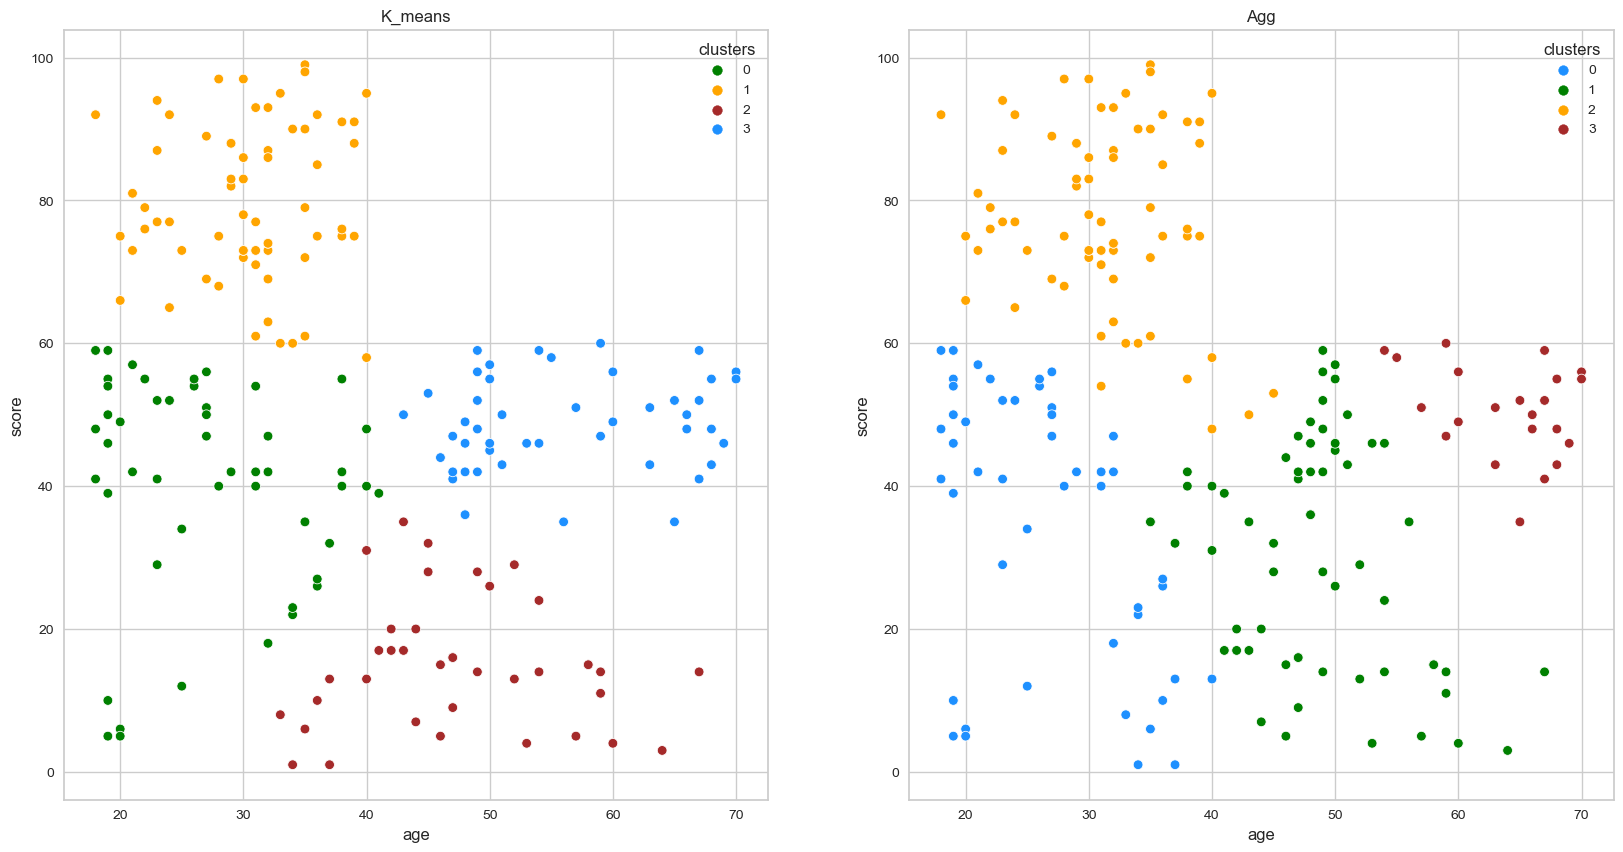

In [244]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='age',
                y='score',
                hue='clusters',
                data=df_kmeans_age_score,
                palette=['green', 'orange', 'brown', 'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='age',
                y='score',
                hue='clusters',
                data=df_hie_age_score,
                palette=['dodgerblue', 'green', 'orange', 'brown'])
plt.title("Agg");

#### Annual Income and Spending Score- x2

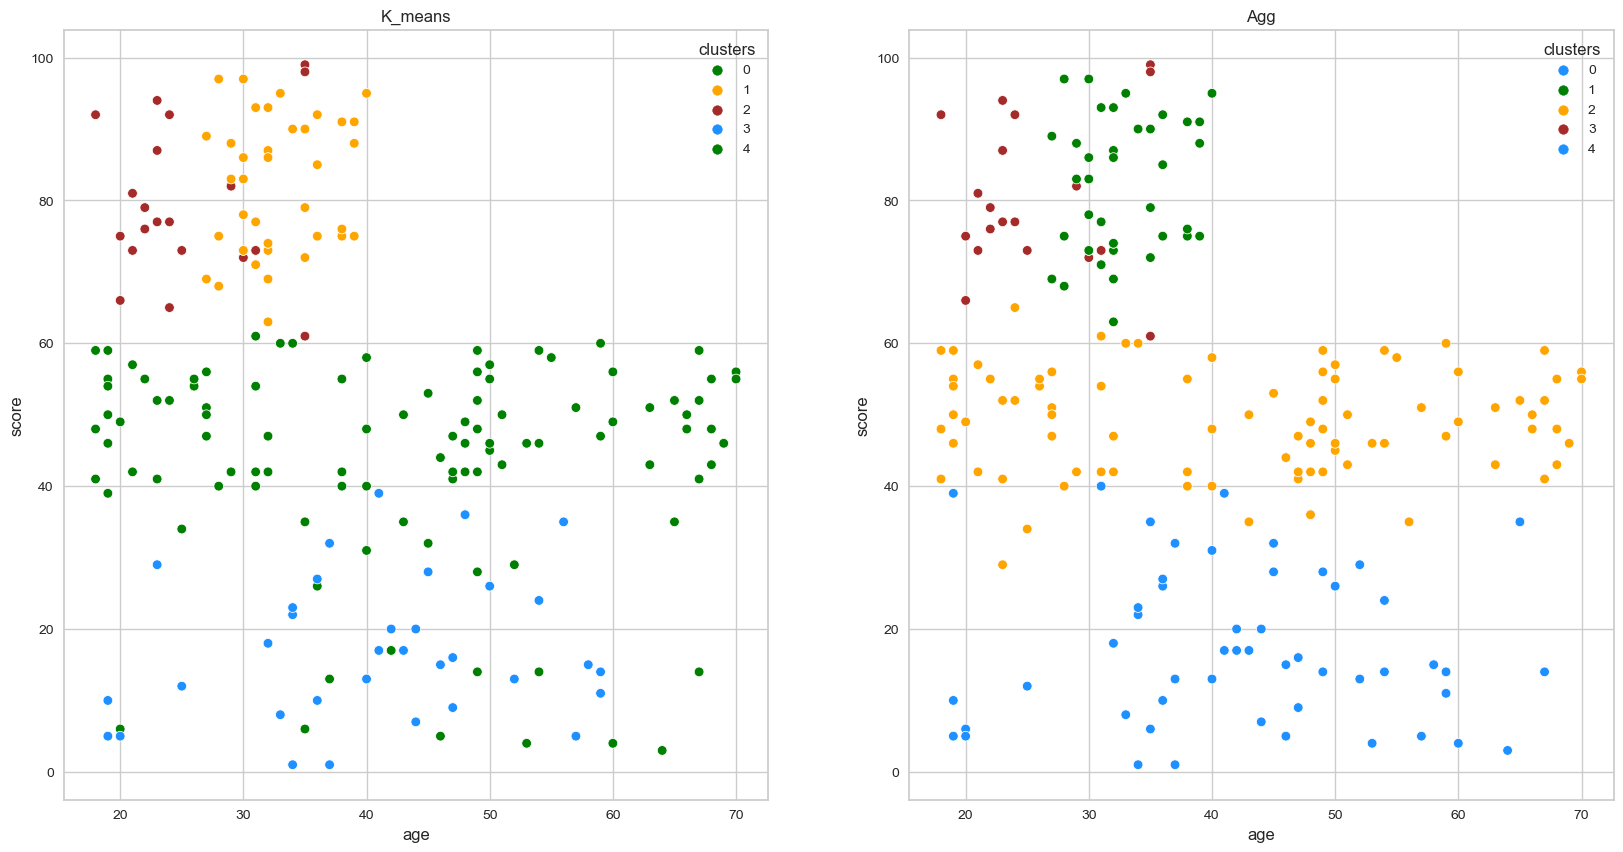

In [245]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='age',
                y='score',
                hue='clusters',
                data=df_kmeans_income_score,
                palette=['green', 'orange', 'brown', 'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='age',
                y='score',
                hue='clusters',
                data=df_hie_income_score,
                palette=['dodgerblue', 'green', 'orange', 'brown'])
plt.title("Agg");

#### Interpretation based on Age and Spending Score- x1

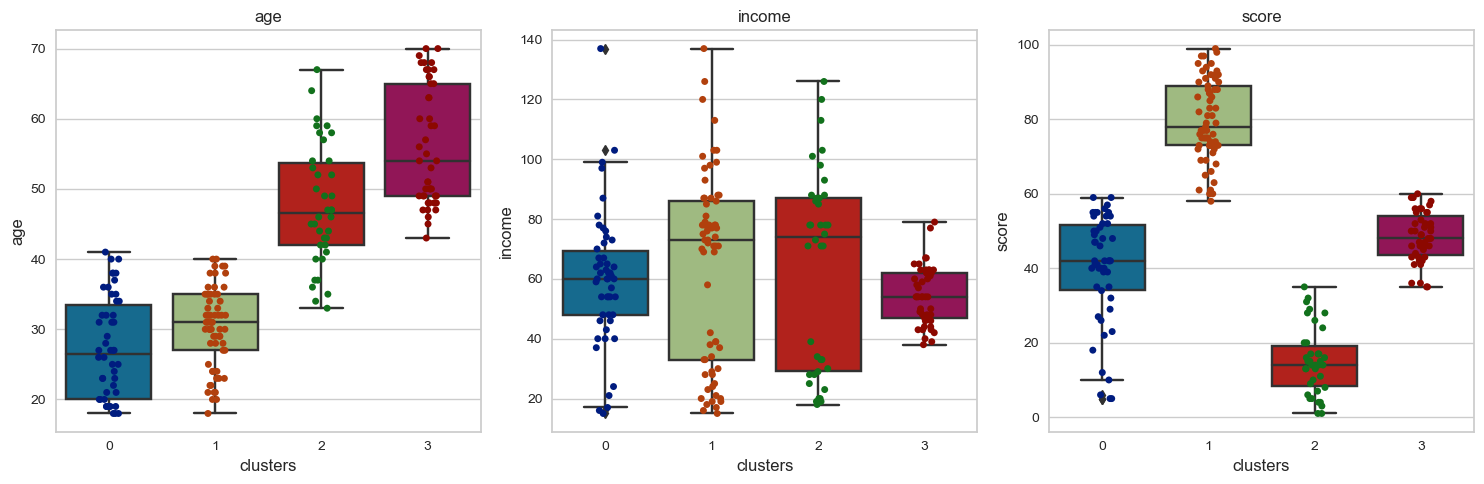

In [255]:
numeric_columns = df_kmeans_age_score.drop(['clusters', 'customer_id'], axis=1).select_dtypes(include='number').columns

num_plots = len(numeric_columns)
num_cols = 3

num_rows = (num_plots + num_cols - 1) // num_cols
plt.figure(figsize=(15, num_rows * 5))

for i, feature in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=feature, x="clusters", data=df_kmeans_age_score)
    sns.stripplot(y=feature, x="clusters", data=df_kmeans_age_score, palette="dark", size=5)
    plt.title(feature)

plt.tight_layout()
plt.show()

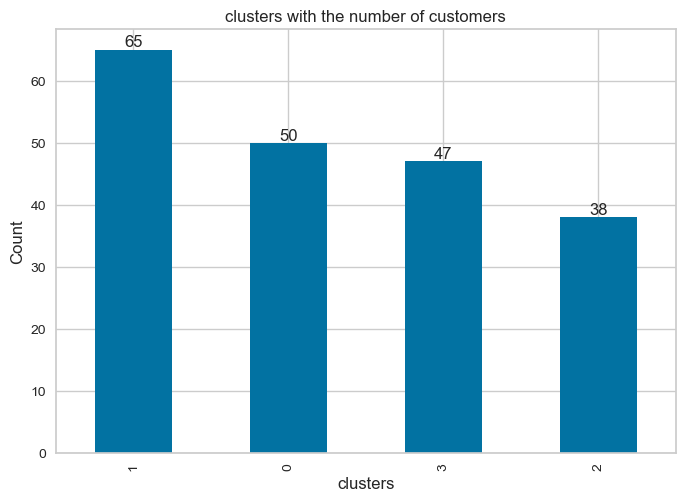

In [249]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_kmeans_age_score.clusters.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

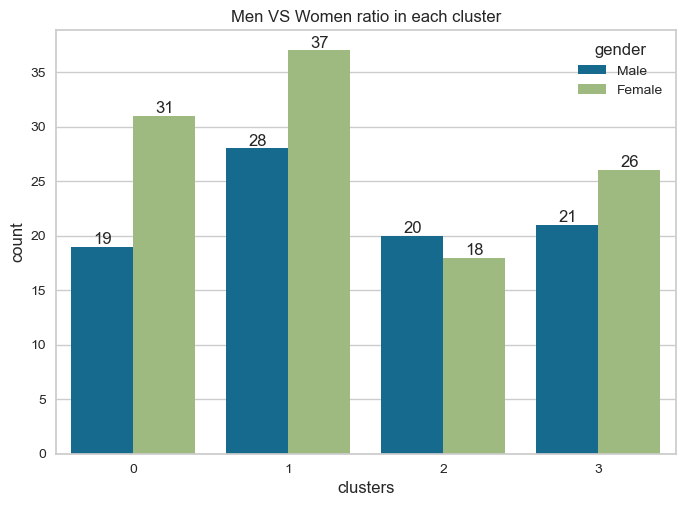

In [250]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df_kmeans_age_score.clusters, hue=df_kmeans_age_score.gender)
for p in ax.containers:
    ax.bar_label(p)
plt.show()
# We count clusters according to gender.

In [254]:
df_kmeans_age_score.drop("customer_id", axis =1).groupby(["clusters"]).mean()

,age,income,score
clusters,,,
0,27.220000,59.620000,40.040000
1,30.292308,63.830769,79.815385
2,47.605263,63.789474,15.000000
3,55.978723,54.425532,48.510638


#### Interpretation based on Annual Income and Spending Score- x2

In [256]:
df_hie_income_score

,customer_id,gender,age,income,score,clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [257]:
df_hie_income_score.clusters.value_counts()

2    85
1    39
0    32
4    23
3    21
Name: clusters, dtype: int64

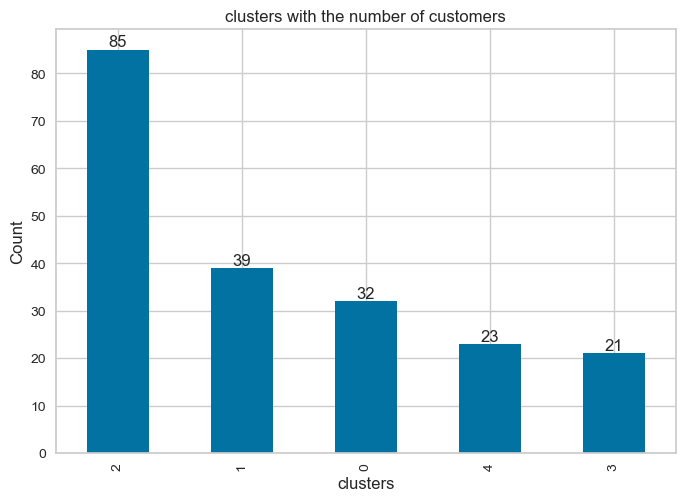

In [260]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = df_hie_income_score.clusters.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0]);

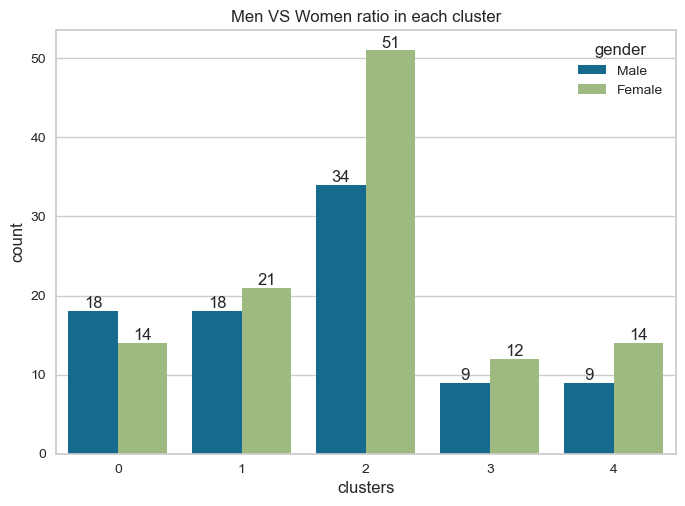

In [261]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df_hie_income_score.clusters, hue=df_hie_income_score.gender)
for p in ax.containers:
    ax.bar_label(p)

In [262]:
df_hie_income_score.groupby(["gender", "clusters"]).mean()

customer_id        age     income      score
gender clusters                                              
Female 0          171.714286  43.785714  93.285714  20.642857
       1          163.333333  32.190476  86.047619  81.666667
       2           88.176471  40.509804  55.784314  48.647059
       3           20.833333  25.583333  24.583333  81.833333
       4           24.714286  43.214286  27.357143  21.714286
Male   0          162.000000  38.833333  86.388889  11.666667
       1          160.444444  33.277778  87.111111  82.666667
       2           87.470588  45.441176  55.852941  49.852941
       3           23.555556  25.000000  25.777778  77.666667
       4           20.333333  48.333333  24.666667  19.666667

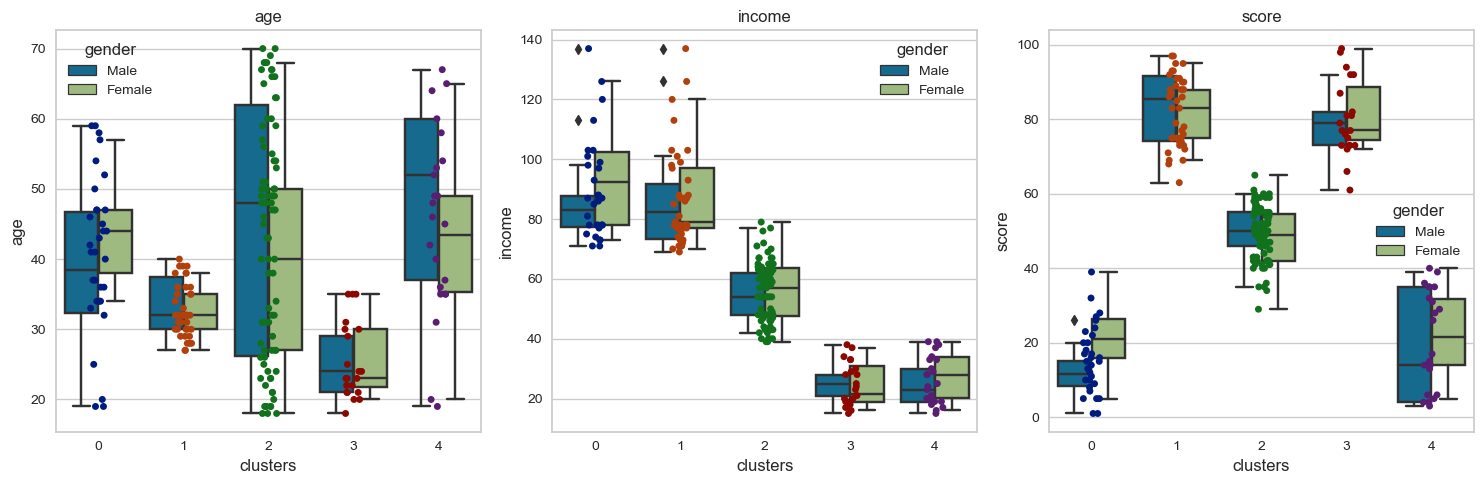

In [265]:
numeric_columns = df_hie_income_score.drop(['clusters', 'customer_id'], axis=1).select_dtypes(include='number').columns

num_plots = len(numeric_columns)
num_cols = 3

num_rows = (num_plots + num_cols - 1) // num_cols
plt.figure(figsize=(15, num_rows * 5))

for i, feature in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=feature, x="clusters", data=df_hie_income_score, hue ="gender")
    sns.stripplot(y=feature, x="clusters", data=df_hie_income_score, palette="dark", size=5)
    plt.title(feature)

plt.tight_layout()
plt.show()


**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

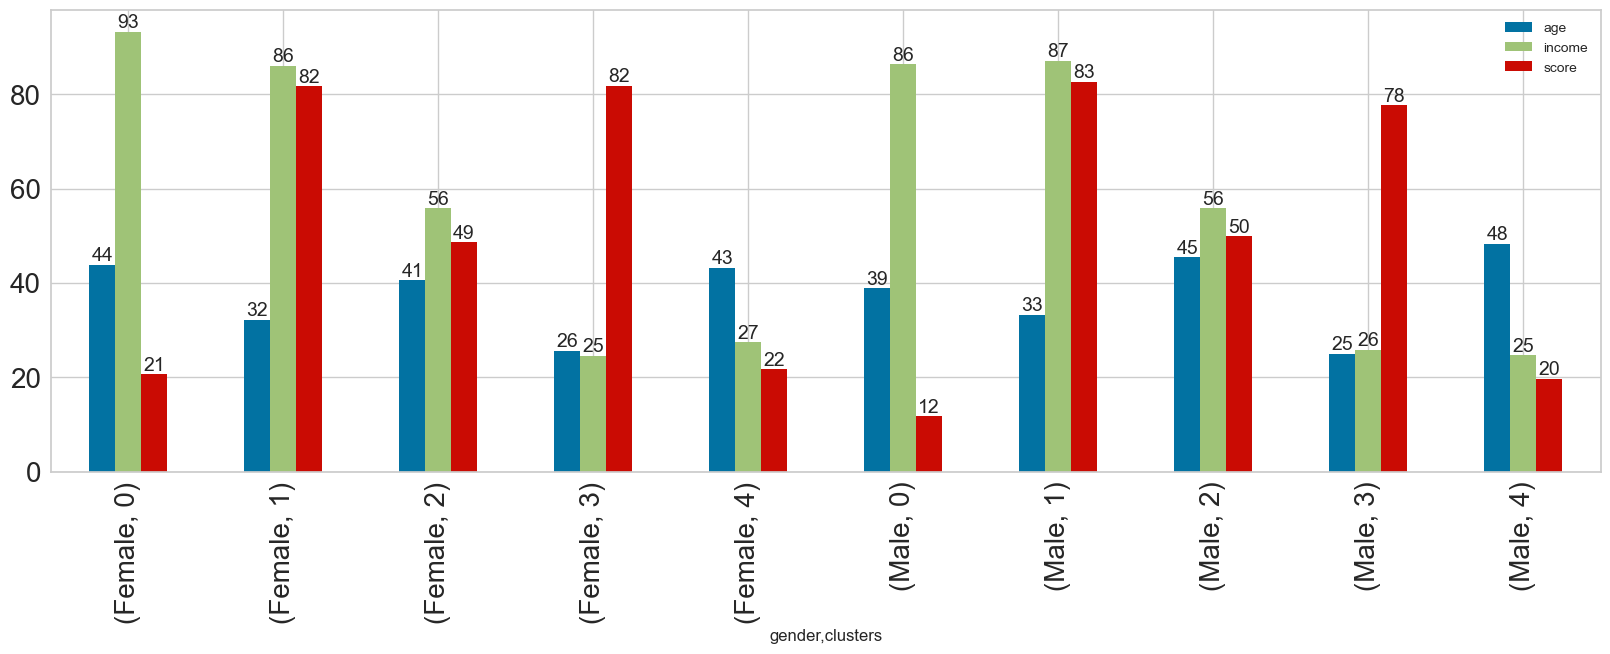

In [279]:
ax = df_hie_income_score.drop("customer_id", axis = 1).groupby(["gender", "clusters"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

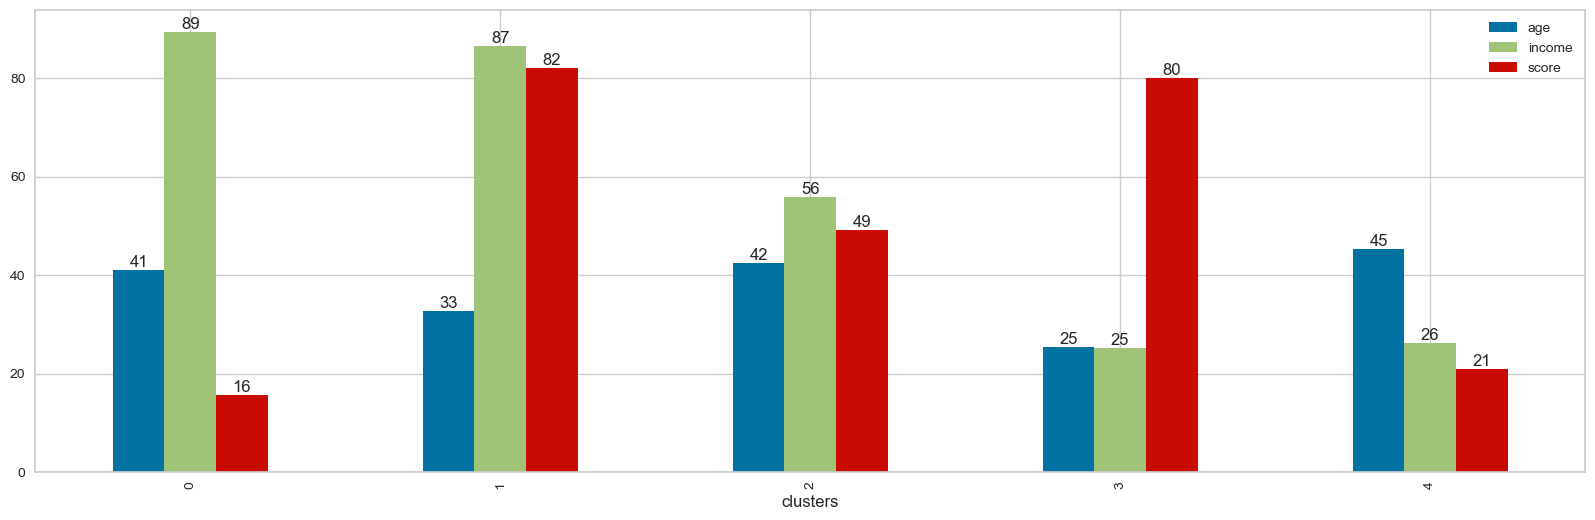

In [277]:
ax = df_hie_income_score.drop("customer_id", axis = 1).groupby("clusters").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___